# Import Libraries

In [1]:
import pathlib
import cv2
import matplotlib.pyplot as plt
import glob

# Haarcascade Path

In [2]:
cascade_path = pathlib.Path(cv2.__file__).parent.absolute() / "data/haarcascade_frontalface_default.xml"
print(cascade_path)

c:\Users\silwa\.conda\envs\daks\lib\site-packages\cv2\data\haarcascade_frontalface_default.xml


In [3]:
# C:\Users\silwa\AppData\Roaming\Python\Python312\site-packages\cv2\data

# Open Camera

In [4]:
camera=cv2.VideoCapture(0)
while True:
    _,frame= camera.read()
    frame = cv2.flip(frame,180)
    if cv2.waitKey(1)==ord('q'):
        break
    cv2.imshow("Faces",frame)
camera.release()
cv2.destroyAllWindows()

# Defining Model

In [5]:
clf = cv2.CascadeClassifier(str(cascade_path))

In [40]:
# camera = cv2.VideoCapture(0)

# while True:
#     _,frame = camera.read()
#     frame = cv2.flip(frame,180)
#     if cv2.waitKey(1)==ord("q"):
#         break
#     cv2.imshow("Faces",frame)

# camera.release()
# cv2.destroyAllWindows()

In [6]:
camera = cv2.VideoCapture(0)

while True:
    _,frame = camera.read()
    frame = cv2.flip(frame,180)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = clf.detectMultiScale(
        gray,
        scaleFactor = 1.1,
        minNeighbors = 5,
        minSize = (30,30),
        flags = cv2.CASCADE_SCALE_IMAGE
    )
    print(faces)
    for (x, y, width, height ) in faces:
        text_img = cv2.putText(frame, 'Jenish Silwal', (x-25,y-25), 
                                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 1)
        cv2.rectangle(frame, (x,y), (x+width, y+width ), (0,255,0), 2)
    cv2.imshow("Faces",frame)

    if cv2.waitKey(1)==ord("q"):
        break

camera.release()
cv2.destroyAllWindows()

[[155 191 229 229]]
[[155 196 229 229]]
[[153 198 230 230]]
[[151 199 233 233]]
[[145 209 229 229]]
[[131 212 229 229]]
[[128 211 231 231]]
[[125 210 231 231]]
[[125 211 231 231]]
[[123 206 234 234]]
[[126 207 232 232]]
[[127 205 231 231]]


# Detecting on Video

In [19]:
camera = cv2.VideoCapture(0)

while True:
    _,frame = camera.read()
    frame = cv2.flip(frame,180)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = clf.detectMultiScale(
        gray,
        scaleFactor = 1.1,
        minNeighbors = 5,
        minSize = (30,30),
        flags = cv2.CASCADE_SCALE_IMAGE
    )
    
    for (x, y, width, height ) in faces:
        cv2.rectangle(frame, (x,y), (x+width, y+width ), (0,255,0), 2)
    
    cv2.imshow("Faces", frame)
    
    if cv2.waitKey(1) == ord("q"):
        break

camera.release()
cv2.destroyAllWindows()
    

# Test on images

In [7]:
def detect(img_gray,img):    
    faces = clf.detectMultiScale(
        img_gray,
        scaleFactor = 1.1,
        minNeighbors = 1,
        minSize = (30,30),
        flags = cv2.CASCADE_SCALE_IMAGE
    )
    print(faces)
    for (x, y, width, height ) in faces:
        cv2.rectangle(img, (x,y), (x+width, y+width ), (0,255,0), 2)

    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB));
    plt.axis('off');
    plt.show()

[[144 300  33  33]
 [309 290  57  57]
 [397 261  52  52]
 [403 317  53  53]
 [361 262  40  40]
 [238 268  34  34]]


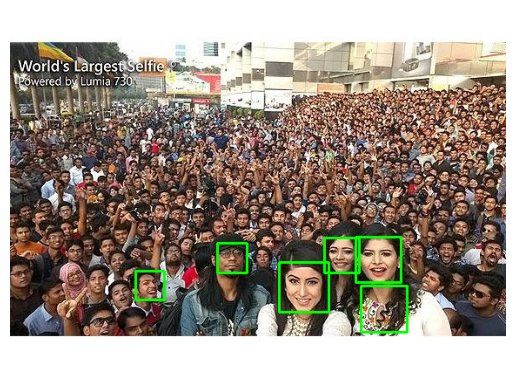

[[118  63  33  33]
 [153  72  36  36]
 [152  12  35  35]
 [ 68  13  62  62]]


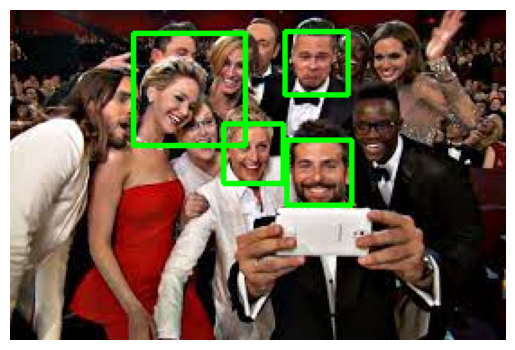

In [8]:
for file in glob.glob('images/*'):
    img = cv2.imread(file)
    gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    detect(gray_img,img)
